In [1]:
%matplotlib inline
import msprime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import SVG

We want to approximate the SFS. We simulate 1000 replicates each consisting of a sample of size n=10 taken from a single panmictic population. We assume a history of an instaneous bottleneck at time T and explore a range of strength parameters:

In [56]:
Nrep = 1000
nsamp = 10
Ne = 1
T = 0.5
slist= np.array([0,0.5,1])

B_cols = [np.zeros(Nrep*len(slist)) for _ in range(nsamp + 1)]
s_col = np.zeros(Nrep*len(slist))
row = 0
for s in slist: 
    demographic_events = [msprime.InstantaneousBottleneck(time=T, strength=s)]
    reps = msprime.simulate(sample_size=nsamp, Ne=Ne, num_replicates = Nrep, demographic_events = demographic_events)
    for ts in reps:
        s_col[row] = s
        tree = next(ts.trees())
        for u in tree.nodes():
            nleaves = tree.num_samples(u)
            if tree.parent(u) != msprime.NULL_NODE:
                B_cols[nleaves][row]+=tree.branch_length(u)
        row+=1

cols = {"B_{}".format(j): B_cols[j] for j in range(1, nsamp)}
cols["s"] = s_col
df = pd.DataFrame(cols)


In [54]:

group = df.groupby("s")
group.describe()

B_1                                                              \
      count      mean       std       min       25%       50%       75%   
s                                                                         
0.0  1000.0  4.026332  2.135170  0.756314  2.560117  3.597605  4.978763   
0.5  1000.0  3.256582  1.768438  0.592182  2.145854  2.760605  3.769528   
1.0  1000.0  3.018020  1.596535  0.625093  2.047080  2.624720  3.418932   

                   B_2              ...           B_8                B_9  \
           max   count      mean    ...           75%        max   count   
s                                   ...                                    
0.0  16.724997  1000.0  2.000771    ...      0.092700  19.530033  1000.0   
0.5  12.855263  1000.0  1.534837    ...      0.078949  13.121612  1000.0   
1.0  12.570398  1000.0  1.250237    ...      0.000000  15.023811  1000.0   

                                                        
         mean       std  min  25%  50%  75%        max  
s                                                       
0.0  0.512795  1.414627  0.0  0.0  0.0  0.0  14.095174  
0.5  0.373948  1.112488  0.0  0.0  0.0  0.0   9.835679  
1.0  0.419618  1.171688  0.0  0.0  0.0  0.0   9.694629  

[3 rows x 72 columns]

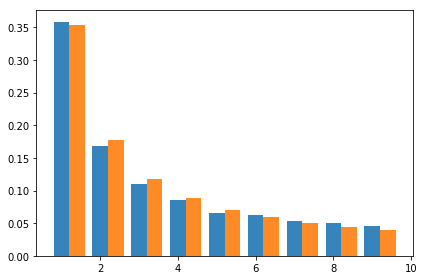

In [44]:
sfs=np.mean(B,axis=0)
sfs/=np.sum(sfs)

expsfs=[(1/i) for i in range(1,10)]
expsfs/=np.sum(expsfs)

fig, ax = plt.subplots()
index = np.arange(1,10)
bar_width = 0.4
opacity = 0.9

simsfs = ax.bar(index, sfs[1:], bar_width, alpha=opacity, label='sim')
expextsfs = ax.bar(index+ bar_width, expsfs, bar_width, alpha=opacity, label='exp')

fig.tight_layout()
plt.show()

In [70]:

Nrep = 10000
nsamp = 10
Ne = 1
T = 0.5
slist= np.array([0,1,2,3])

row = 0
data = {}
for s in slist: 
    demographic_events = [msprime.InstantaneousBottleneck(time=T, strength=s)]
    reps = msprime.simulate(sample_size=nsamp, Ne=Ne, num_replicates = Nrep, demographic_events = demographic_events)
    B = np.zeros((Nrep, nsamp))
    for rep_index, ts in enumerate(reps):
        tree = next(ts.trees())
        for u in tree.nodes():
            nleaves = tree.num_samples(u)
            if tree.parent(u) != msprime.NULL_NODE:
                B[rep_index, nleaves]+=tree.branch_length(u)    
    data[s] = np.mean(B, axis=0)
    data[s] /=np.sum(data[s])

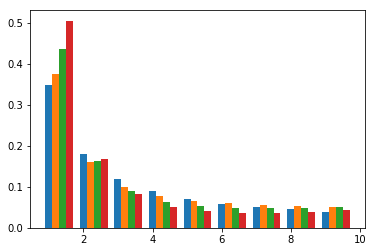

In [72]:
bar_width=0.2
index = np.arange(1, nsamp)
j = 0
for s, B in data.items():
    plt.bar(index + j * bar_width, B[1:], bar_width, label=str(s))
    j += 1

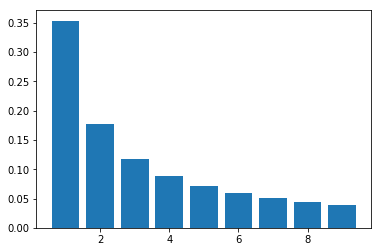

[ 0.35348576  0.17674288  0.11782859  0.08837144  0.07069715  0.05891429
  0.05049797  0.04418572  0.0392762 ]
